In [1]:
import numpy as np

In [2]:
# 데이터표현

# 스칼라 (0D 텐서, 스칼라 텐서, 0차원 텐서)
x = np.array(12)
x.ndim

0

In [3]:
x

array(12)

In [4]:
# 벡터 (1D 텐서), 딱 하나의 축을 가진다
x = np.array([12, 3, 6, 14, 7]) # 5개의 원소를 가지므로 5차원 벡터라고 부른다.
x.ndim
# 5D 벡터와 5D 텐서는 다른 것. 5D 벡터는 하나의 축을 따라 5개의 차원을 가진 것이고 5D 텐서는 5개의 축을 가진 것이다. 
# (텐서의 각 축을 따라 여러 개의 차원을 가진 벡터가 놓일 수 있다.)
# 차원수(dimensionality)는 특정 축을 따라 놓인 원소의 개수(5D 벡터와 같은 경우) 이거나 텐서의 축 개수(5D 텐서와 같은 경우)를 의미하므로 가끔 혼동하기 쉽다.
# 후자의 경우 랭크 5인 텐서라고 말한다. (텐서의 랭크가 축의 개수)

1

In [5]:
x

array([12,  3,  6, 14,  7])

In [6]:
# 행렬 (2D 텐서)
# 2개의 축이 있다. 보통 행 row 과 열 column 이라고 부른다.

x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

In [7]:
x

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

In [8]:
# 3D 텐서와 고차원 텐서
# 이런 행렬들을 하나의 새로운 배열로 합치면 숫자가 채워진 직육면체 형태로 해적할 수 있는 3D 텐서가 만들어진다.
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim
# 3D 텐서들을 하나의 배열로 합치면 4D 텐서를 만드는 식으로 이어진다. 딥러닝에서는 보통 0D에서 4D까지의 텐서를 다룬다.
# 동영상 데이터를 다룰 경우에는 5D 텐서까지 가기도 한다.

3

In [9]:
x

array([[[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]])

## 텐서의 핵심 속성
- 축의 개수(랭크) : 넘파이에서는 ndim 속성
- 크기(shape) : 각 축을 따라 얼마나 많은 차원이 있는지를 나타낸 파이썬의 튜플(tuple). 벡터의 크기는 (5,) 처럼 1개의 원소로 이루어진 튜플. 배열 스칼라는 ()처럼 크기가 없다
- 데이터 타입(넘파이에서는 dtype) : 텐서는 사전에 할당되어 연속된 메모리에 저장되어야 하므로 넘파이 배열은 가변 길이의 문자열을 지원하지 않는다.

In [10]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 58s 5us/step


In [11]:
train_images.shape

(60000, 28, 28)

In [12]:
train_images.dtype # 8비트 정수형 3D 텐서

dtype('uint8')

In [13]:
import matplotlib.pyplot as plt

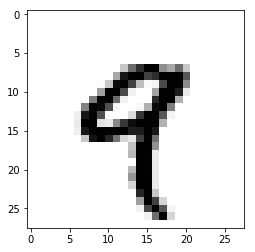

In [14]:
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [15]:
# 넘파이로 텐서 조작하기

my_slice = train_images[10:100]
print(my_slice.shape)

my_slice = train_images[10:100, :, :]
print(my_slice.shape)

my_slice = train_images[10:100, 0:28, 0:28]
print(my_slice.shape)

# 이미지의 오른쪽 아래 14 x 14 픽셀을 선택하려면
my_slice = train_images[:, 14:, 14:]
print(my_slice.shape)

(90, 28, 28)
(90, 28, 28)
(90, 28, 28)
(60000, 14, 14)


In [16]:
# 베채 데이터
# 모든 데이터 텐서의 첫 번째 축은 샘플 축(sample axis)
# 배치 데이터를 다룰 떄는 첫 번째 축(0번 축)을 배치 축(batch axis) 또는 배치 차원(batch dimension)이라고 부른다.
batch = train_images[:128]
batch = train_images[128:256]
# n번째 배치
n = 5
batch = train_images[128 * n : 128 * (n + 1)]

## 텐서의 실제 사례
- 벡터 데이터 : (samples, features) 크기의 2D 텐서
- 시계열 데이터 또는 시퀀스 데이터 : (samples, timesteps, features) 크기의 3D 텐서
- 이미지 : (samples, height, width, channels) 또는 (samples, channels, height, width) 크기의 4D 텐서
- 동영상 : (samples, frames, height, width, channels) 또는 (samples, frames, channels, height, width) 크기의 5D 텐서

## 벡터 데이터

배치 데이터는 2D 텐서로 인코딩될 것.(즉 벡터의 배열). 여기서 첫번째 축은 샘플 축이고, 두 번째 축은 특성 축(feature axis)

- 사람의 나이, 우편 번호, 소득으로 구섣뇌 인구 통계 데이터. 각 사람은 3개의 값을 가진 벡터로 구성되고 10만명이 포함된 전체 데이터셋은 (100000, 3) 크기의 텐서에 저장될 수 있다.
- (공통 단어 2만 개로 만든 사전에서) 각 단어가 등장한 횟수로 표현된 텍스트 문서 데이터셋. 각 문서는 2만 개의 원소(사전에 있는 단어마다 하나의 원소에 대응)를 가진 벡터로 인코딩 될 수 있다. 500개의 문서로 이루어진 전체 데이터셋은 (500, 20000) 크기의 텐서로 저장.

In [ ]:
/''